In [ ]:
Q1. What is Gradient Boosting Regression?


Gradient Boosting Regression, often referred to as simply Gradient Boosting or Gradient Boosted Regression Trees (GBRT), is a powerful machine learning technique used for regression tasks. It is an ensemble learning method that combines the predictions of multiple weak learners (typically shallow decision trees) to create a strong predictive model.

Here's a breakdown of how Gradient Boosting Regression works:

1. **Initialization:**
   - The process begins with an initial prediction, which is often the mean of the target variable for the entire training dataset.

2. **Building Weak Learners (Regression Trees):**
   - A weak learner, usually a shallow decision tree, is trained to predict the residual errors (the differences between the actual and predicted values) from the previous iteration.
   - The weak learner is fitted to the negative gradient of the loss function with respect to the current model's predictions.

3. **Weighting and Combining:**
   - The predictions of the weak learner are multiplied by a small learning rate (often denoted as \( \eta \)) to control the step size of the update.
   - The weighted predictions are then added to the current model, updating the predictions based on the residuals.

4. **Iteration:**
   - Steps 2 and 3 are repeated for a predefined number of iterations or until a stopping criterion is met.
   - Each new weak learner focuses on capturing the remaining errors or residuals that were not adequately addressed by the previous learners.

5. **Final Model:**
   - The final prediction is the sum of the initial prediction and the weighted contributions of all the weak learners.

The key idea behind Gradient Boosting Regression is the sequential training of weak learners, each one addressing the errors left by the ensemble of previous learners. The "gradient" in the name refers to the optimization process, as the algorithm minimizes the gradient of the loss function with respect to the model's predictions.

Gradient Boosting Regression is effective in capturing complex relationships in the data and is robust to outliers. However, it may require careful tuning of hyperparameters, such as the learning rate, maximum depth of trees, and the number of trees, to achieve optimal performance. Popular implementations of Gradient Boosting include scikit-learn's GradientBoostingRegressor, XGBoost, LightGBM, and CatBoost.


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


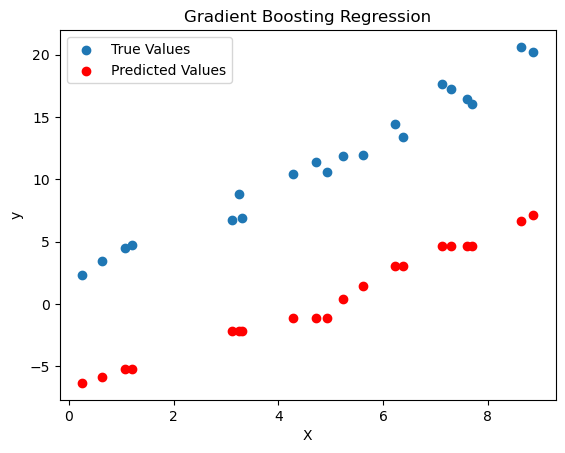

Mean Squared Error: 125.18
R-squared: -3.27


In [1]:
# Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a
# simple regression problem as an example and train the model on a small dataset. Evaluate the model's
# performance using metrics such as mean squared error and R-squared.

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X.squeeze() + 1.5 + np.random.randn(100)

# Define the Gradient Boosting class
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []

    def fit(self, X, y):
        # Initial prediction is the mean of the target variable
        prediction = np.mean(y)
        
        for _ in range(self.n_estimators):
            # Compute the residuals
            residuals = y - prediction
            
            # Fit a weak learner (decision stump) to the residuals
            tree = DecisionStump()
            tree.fit(X, residuals)
            
            # Update the prediction with the weighted contribution of the weak learner
            prediction += self.learning_rate * tree.predict(X)
            
            # Save the weak learner in the list of models
            self.models.append(tree)

    def predict(self, X):
        # Make predictions using all weak learners
        predictions = [model.predict(X) for model in self.models]
        # Sum the predictions and apply the learning rate
        return self.learning_rate * np.sum(predictions, axis=0)

# Define a simple Decision Stump class (shallow decision tree)
class DecisionStump:
    def __init__(self):
        self.split_feature = None
        self.split_threshold = None
        self.left_value = None
        self.right_value = None

    def fit(self, X, y):
        # Find the best split based on mean squared error
        best_mse = float('inf')
        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask
                mse = self.compute_mse(y, left_mask, right_mask)
                if mse < best_mse:
                    best_mse = mse
                    self.split_feature = feature
                    self.split_threshold = threshold
                    self.left_value = np.mean(y[left_mask])
                    self.right_value = np.mean(y[right_mask])

    def compute_mse(self, y, left_mask, right_mask):
        left_mse = np.mean((y[left_mask] - np.mean(y[left_mask]))**2)
        right_mse = np.mean((y[right_mask] - np.mean(y[right_mask]))**2)
        return left_mse + right_mse

    def predict(self, X):
        # Make predictions for a single decision stump
        return np.where(X[:, self.split_feature] <= self.split_threshold,
                        self.left_value, self.right_value)

# Split the dataset into training and testing sets
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

# Train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot the true values vs. predicted values
plt.scatter(X_test, y_test, label='True Values')
plt.scatter(X_test, y_pred, color='red', label='Predicted Values')
plt.legend()
plt.title('Gradient Boosting Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Print evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')





Best Hyperparameters:
Learning Rate: 0.1
Number of Trees: 50
Max Depth: 2


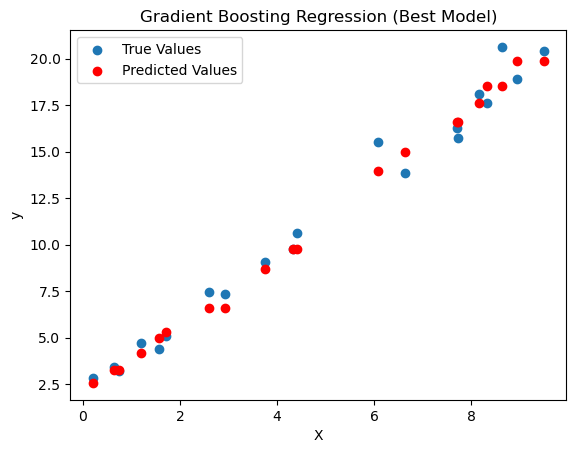


Evaluation Metrics for the Best Model:
Mean Squared Error: 0.71
R-squared: 0.98

Cross-validated Results:
R-squared: 0.49, Hyperparameters: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50}
R-squared: 0.77, Hyperparameters: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}
R-squared: 0.93, Hyperparameters: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200}
R-squared: 0.52, Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
R-squared: 0.80, Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
R-squared: 0.93, Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
R-squared: 0.53, Hyperparameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}
R-squared: 0.80, Hyperparameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}
R-squared: 0.93, Hyperparameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}
R-squared: 0.96, Hyperparameters: {'learn

In [2]:
# Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to
# optimise the performance of the model. Use grid search or random search to find the best
# hyperparameters

import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X.squeeze() + 1.5 + np.random.randn(100)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Gradient Boosting model
gb_model = GradientBoostingRegressor()

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4]
}

# Define scoring metrics
scoring = {
    'MSE': make_scorer(mean_squared_error),
    'R2': make_scorer(r2_score)
}

# Perform grid search
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring=scoring, refit='R2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"Learning Rate: {best_params['learning_rate']}")
print(f"Number of Trees: {best_params['n_estimators']}")
print(f"Max Depth: {best_params['max_depth']}")

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot the true values vs. predicted values
plt.scatter(X_test, y_test, label='True Values')
plt.scatter(X_test, y_pred, color='red', label='Predicted Values')
plt.legend()
plt.title('Gradient Boosting Regression (Best Model)')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Print evaluation metrics for the best model
print('\nEvaluation Metrics for the Best Model:')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Print cross-validated results for all hyperparameter combinations
results = grid_search.cv_results_
print("\nCross-validated Results:")
for mean_score, params in zip(results['mean_test_R2'], results['params']):
    print(f"R-squared: {mean_score:.2f}, Hyperparameters: {params}")




In [ ]:
Q4. What is a weak learner in Gradient Boosting?


In the context of Gradient Boosting, a weak learner refers to a base model or a simple model that performs slightly better than random chance on a given task. The term "weak" does not imply that the model is inherently poor; rather, it suggests that the model is not complex or expressive enough to capture the entire underlying pattern in the data. The weakness of the individual models is overcome by combining them into an ensemble through the boosting process.

Key characteristics of a weak learner in Gradient Boosting include:

1. **Low Complexity:**
   - Weak learners are typically simple models with low complexity. For example, in the context of regression problems, weak learners could be shallow decision trees or even individual decision stumps (trees with only one split).

2. **Limited Expressiveness:**
   - A weak learner has limited ability to capture complex relationships in the data. It may struggle with capturing interactions or handling noise in the dataset.

3. **Slightly Better Than Random:**
   - While a weak learner may not perform exceptionally well on its own, it should be slightly better than random chance. This allows the boosting algorithm to focus on the mistakes made by the weak learner and improve iteratively.

4. **Training on Residuals:**
   - In the context of Gradient Boosting Regression, weak learners are trained to predict the residuals (the differences between the actual and predicted values) of the ensemble's current approximation. This sequential training process allows each weak learner to address the errors left by the previous ones.

The strength of Gradient Boosting lies in its ability to sequentially train and combine these weak learners. The boosting algorithm assigns higher weights to instances that were difficult to predict in previous iterations, thereby focusing the subsequent weak learners on the most challenging parts of the dataset.

Examples of weak learners used in Gradient Boosting include shallow decision trees, linear models, or even more specialized models like decision stumps (trees with a single split). Despite their simplicity, these weak learners collectively contribute to the creation of a strong predictive model when combined through the boosting process.

In [ ]:
Q5. What is the intuition behind the Gradient Boosting algorithm?



The Gradient Boosting algorithm's intuition lies in the process of sequentially combining weak learners to create a strong, accurate predictive model. Here's a step-by-step breakdown of the intuition behind Gradient Boosting:

1. **Initialization:**
   - The algorithm starts with an initial approximation, often a simple prediction like the mean of the target variable for regression tasks.

2. **Sequential Training of Weak Learners:**
   - A weak learner (such as a shallow decision tree) is trained to predict the residuals (the differences between the actual and predicted values) of the current approximation.
   - The weak learner focuses on the mistakes made by the ensemble so far, capturing the errors that remain unaddressed.

3. **Weighted Combination of Weak Learners:**
   - The predictions of the weak learner are multiplied by a small learning rate (or shrinkage parameter) to control the contribution of each weak learner.
   - The weighted predictions are added to the current approximation, updating the model.

4. **Iterative Process:**
   - Steps 2 and 3 are repeated for a predefined number of iterations or until a stopping criterion is met.
   - Each new weak learner is trained to correct the errors made by the ensemble up to that point.

5. **Final Prediction:**
   - The final prediction is the sum of the initial approximation and the weighted contributions of all the weak learners.

The key intuition behind Gradient Boosting can be understood through the following points:

- **Gradient Descent Optimization:**
  - The algorithm minimizes a loss function by iteratively moving in the direction of steepest decrease in the loss. In each iteration, the weak learner is trained to approximate the negative gradient of the loss with respect to the current model's predictions.

- **Focus on Residuals:**
  - Weak learners are tasked with capturing the residuals or errors of the ensemble's current approximation. This sequential approach allows the algorithm to pay more attention to instances that are challenging to predict.

- **Combining Weak Predictions:**
  - The combination of multiple weak learners, each focusing on a specific aspect of the data, results in a strong ensemble model. The final prediction is a weighted sum of the predictions from all weak learners.

- **Regularization and Shrinkage:**
  - The learning rate (shrinkage parameter) controls the step size of each update. A smaller learning rate often improves generalization by preventing the algorithm from overfitting the training data.

- **Robustness to Overfitting:**
  - By focusing on residuals and using weak learners, Gradient Boosting tends to be robust to overfitting, especially when the number of weak learners is controlled.

In summary, Gradient Boosting builds a strong predictive model by iteratively improving upon the mistakes of the ensemble, with each weak learner contributing to a refined approximation of the underlying pattern in the data. The algorithm's success lies in its ability to learn complex relationships, handle non-linearity, and provide high predictive accuracy.

In [ ]:
Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?


The Gradient Boosting algorithm builds an ensemble of weak learners sequentially through an iterative process. The key steps involved in constructing this ensemble are as follows:

1. **Initialization:**
   - The process begins with an initial approximation, often a simple prediction that serves as the starting point. For regression tasks, this could be the mean of the target variable.

2. **Compute Residuals:**
   - Calculate the residuals, which are the differences between the actual target values and the current predictions of the ensemble.

3. **Train Weak Learner on Residuals:**
   - Fit a weak learner (e.g., shallow decision tree) to the residuals of the current approximation. The weak learner is trained to predict the remaining errors or residuals in the data.

4. **Compute Contribution of Weak Learner:**
   - Multiply the predictions of the weak learner by a small learning rate (shrinkage parameter). This scaling factor controls the contribution of each weak learner to the overall ensemble.

5. **Update Model:**
   - Add the scaled predictions of the weak learner to the current approximation. This updates the model, and the ensemble becomes the sum of the previous predictions and the contributions from the new weak learner.

6. **Repeat:**
   - Steps 2-5 are repeated for a predefined number of iterations or until a stopping criterion is met. In each iteration, a new weak learner is trained to capture the errors left by the ensemble up to that point.

7. **Final Ensemble:**
   - The final prediction is the sum of all the weak learners' contributions, resulting in a strong predictive model.

The algorithm's ability to focus on residuals and sequentially refine its predictions makes it effective for capturing complex relationships in the data. Each weak learner is trained to address the errors made by the ensemble up to that iteration, allowing the model to iteratively improve its performance.

The ensemble construction process can be visualized as follows:

\[ F(x) = F_0(x) + \eta \cdot h_1(x) + \eta \cdot h_2(x) + \ldots + \eta \cdot h_T(x) \]

Where:
- \( F(x) \) is the final prediction of the ensemble.
- \( F_0(x) \) is the initial approximation.
- \( \eta \) is the learning rate (shrinkage parameter).
- \( h_t(x) \) is the prediction of the \( t \)-th weak learner.

The ensemble \( F(x) \) combines the predictions of all weak learners, each contributing a scaled amount to the final prediction. The iterative nature of Gradient Boosting allows the algorithm to build a highly adaptive and accurate model by focusing on the challenging aspects of the data in each iteration.

In [ ]:
Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting
algorithm?


Constructing the mathematical intuition of the Gradient Boosting algorithm involves understanding the fundamental principles that guide its training process. The mathematical formulation is based on optimization principles and the idea of iteratively improving a model by minimizing a loss function. Here are the key steps involved in constructing the mathematical intuition of the Gradient Boosting algorithm:

1. **Objective Function:**
   - Define an objective function that represents the problem you want to solve. In the context of regression, this is often a loss function that measures the difference between the model's predictions and the actual target values.

   \[ \text{Objective Function} = \sum_{i=1}^{N} L(y_i, F(x_i)) \]

   Where:
   - \( N \) is the number of instances in the training dataset.
   - \( L \) is the loss function.
   - \( y_i \) is the true target value for instance \( i \).
   - \( F(x_i) \) is the current model's prediction for instance \( i \).

2. **Initialization:**
   - Initialize the model's prediction as a constant value, often the mean of the target variable for regression problems.

   \[ F_0(x) = \text{initial constant value} \]

3. **Compute Residuals:**
   - Calculate the residuals, which are the differences between the true target values and the current model's predictions.

   \[ \text{Residuals}_i = y_i - F_0(x_i) \]

4. **Sequential Training of Weak Learners:**
   - For each iteration \( t \), train a weak learner (e.g., a decision tree) on the residuals from the previous iteration.

   \[ h_t(x) = \text{argmin}_h \sum_{i=1}^{N} L(y_i, F_{t-1}(x_i) + h(x_i)) \]

   This minimizes the loss function with respect to the weak learner's predictions.

5. **Compute Contribution of Weak Learner:**
   - Determine the contribution of the weak learner by scaling its predictions with a small learning rate (\( \eta \)).

   \[ \text{Contribution}_t(x) = \eta \cdot h_t(x) \]

6. **Update Model:**
   - Update the model by adding the contribution of the weak learner to the current approximation.

   \[ F_t(x) = F_{t-1}(x) + \text{Contribution}_t(x) \]

7. **Repeat:**
   - Repeat steps 3-6 for a predefined number of iterations or until a stopping criterion is met.

8. **Final Model:**
   - The final model is the sum of all weak learners' contributions.

   \[ F(x) = F_0(x) + \sum_{t=1}^{T} \text{Contribution}_t(x) \]

The goal of the Gradient Boosting algorithm is to find the weak learners (\( h_t(x) \)) that, when combined, minimize the overall loss function. The learning rate controls the contribution of each weak learner, and the process iteratively focuses on improving the model's predictions by addressing the residuals left by the ensemble up to the current iteration.

In summary, the mathematical intuition of Gradient Boosting involves the minimization of a loss function through the sequential training of weak learners, each contributing to the improvement of the model's predictions. The final model is a weighted sum of these weak learners, where the weights are determined by the learning rate.